# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
config_path = 'configs/simple_RE_config_shared.yml'

loaded_info = parse_config_for_analysis(config_path)



C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:24: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json
200


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


load pretrained_model:  ./models/small_lm.pt
load pretrained_model:  ./models/small_lm_shared_rationalized.pt


In [3]:
lm_RE = loaded_info["lightning_language_model_RE"].to("cuda")
lm = loaded_info["lightning_language_model_no_RE"].to("cuda")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]

## Perplexity and Accuracy

In [4]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE

lm_RE.hard = True
lm_RE_result = get_results_RE(lm_RE, dataloader_test, 1,)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


100%|███████████████████████████████████████████████████████████████████████████████| 184/184 [00:01<00:00, 112.40it/s]

{'mean_acc': {'mean': 0.3740597965077854, 'std': 0.00023589425200723127}, 'mean_perplexity': {'mean': 27.81058743335991, 'std': 0.013384535633319495}, 'mean_mask_percentage': {'mean': 0.1499244029198154, 'std': 0.00028228166134306777}}
{'mean_acc': 0.38537945775372195, 'mean_perplexity': 25.526450388929813, 'mean_mask_percentage': 0}


## Change in perplexity TODO

In [5]:
# ### Next we test what happens if we check te change in perplexity of the RE. 
# from utils.analysis import calc_change_in_perplexity_experiment
# change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=1)
# change_in_perplexity

## Distribution of mask

In [6]:
from utils.analysis import rational_analysis

#Make sure we use the hard (binarized) values


rational_distributions = rational_analysis(lm_RE, dataloader_test)
print(rational_distributions)

{'abs_average': 0.0, 'rel_average': 0.0, 'abs_pos_count': Counter({1.0: 5876, 2.0: 4729, 3.0: 1290, 6.0: 1197, 7.0: 1181, 5.0: 1127, 8.0: 1084, 4.0: 1070, 9.0: 950, 10.0: 805, 11.0: 686, 12.0: 563, 13.0: 437, 14.0: 371, 15.0: 298, 16.0: 246, 17.0: 208, 18.0: 186, 20.0: 174, 19.0: 173, 21.0: 167, 22.0: 153, 26.0: 153, 25.0: 141, 24.0: 136, 27.0: 131, 23.0: 129, 29.0: 128, 28.0: 116, 32.0: 113, 36.0: 111, 34.0: 109, 40.0: 108, 35.0: 106, 33.0: 104, 37.0: 103, 30.0: 99, 38.0: 99, 44.0: 99, 47.0: 97, 51.0: 95, 54.0: 95, 42.0: 94, 49.0: 94, 31.0: 93, 41.0: 90, 64.0: 90, 52.0: 89, 53.0: 88, 39.0: 87, 61.0: 85, 50.0: 84, 43.0: 83, 46.0: 83, 60.0: 82, 63.0: 81, 59.0: 79, 45.0: 78, 55.0: 78, 57.0: 77, 48.0: 73, 65.0: 73, 67.0: 73, 75.0: 73, 74.0: 72, 56.0: 70, 62.0: 70, 58.0: 69, 72.0: 69, 70.0: 68, 69.0: 66, 68.0: 65, 77.0: 62, 79.0: 62, 71.0: 61, 76.0: 61, 80.0: 60, 82.0: 60, 84.0: 58, 93.0: 58, 86.0: 57, 66.0: 56, 81.0: 56, 88.0: 56, 78.0: 55, 83.0: 55, 73.0: 54, 85.0: 54, 87.0: 54, 110.0: 5

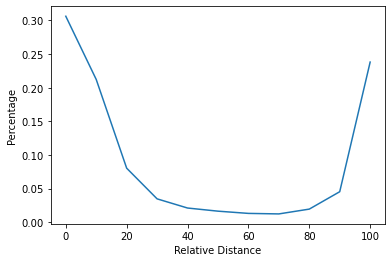

In [7]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
total = sum(relative_counts.values())
X = [int(k) for k in relative_counts.keys()] 
Y = [r/total for r in relative_counts.values()]

pairs = sorted([(x,y) for x,y in zip(X, Y)], key=lambda p: p[0])
plt.xlabel
X_sorted = [p[0] for p in pairs]
Y_sorted = [p[1] for p in pairs]
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.plot(X_sorted, Y_sorted, "")


<BarContainer object of 11 artists>

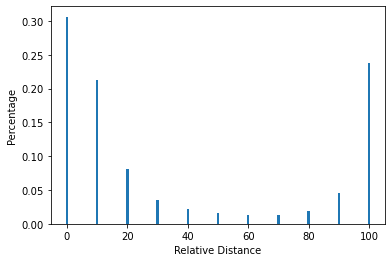

In [8]:
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.bar(X, Y)

## Analysing some examples

In [9]:
examples = ["How are you doing? [SEP]", "What did you do today? [SEP]", "How's work? [SEP]", "Would you like some coffee? [SEP]"]

In [10]:
## First with greedy rationals
completed_dialogue = lm_RE.complete_dialogues(examples, total_length=200, greedy_rationals=False)


In [11]:
from utils.analysis import pretty_print_completed_dialogues
pretty_print_completed_dialogues(completed_dialogue)

context ----> response
how are you doing ? [SEP] ------> i was in the class , but you were really noticed me . [SEP]
how are you [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [SEP] ------> i am not going to be a good job . [SEP]
how are you [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] . [SEP] ------> what ? why are you going to work in ? [SEP]
how are you [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [SEP] what ? why are you going to work in ? [SEP] ------> i don ’ t think it ' s time to go . [SEP]
how are you [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MA

In [12]:
completed_dialogue

[{'completed_dialogue': "how are you doing ? [SEP] i was in the class , but you were really noticed me . [SEP] i am not going to be a good job . [SEP] what ? why are you going to work in ? [SEP] i don ’ t think it ' s time to go . [SEP] really ? [SEP] sure . [SEP] thank you for inviting me . [SEP] i ’ ll call you later . [SEP] what ’ s wrong with you ? [SEP] well , just give me another one . [SEP] you are not going to get a good time and i ' m not going to go to school tomorrow . [SEP] that sounds good . [SEP] what did he do ? [SEP] that sounds good . [SEP] i hope so . [SEP] thank you for coming . [SEP] thank you for your help . [SEP] i think it ’ s a good idea . [SEP] that ' s right . [SEP] that ’ s too bad ! [SEP] i ’ ll take the traffic lights . [SEP] thank you . [SEP] thank you . [SEP] bye . [SEP] oh , thank you . [SEP]",
  'rationals': [tensor([]),
   tensor([ True,  True,  True, False, False, False, False, False, False, False,
           False, False, False, False, False, False, 